# Part I - Exploratory data Analysis on the Prosper Loan Data
## by Eliel Godsent

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [22]:
data = pd.read_csv('prosperLoanData.csv') # import data
pd.options.display.max_columns = None # displey all rows

data.head() # view the data head

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [23]:
data.info() # see brief info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Because this is a visualization project, i will not be diving deep into data wrangling, simply drop missing values, select needed columns, and convert data types

lisitng category, income range, 

In [24]:
data.dropna(axis=1, inplace=True) # drop missing values

# create function to convert columns to datetime dtype
toDate = lambda column: pd.to_datetime(data[column], infer_datetime_format=True)

# function call
data['ListingCreationDate'] = toDate('ListingCreationDate')
data['DateCreditPulled'] = toDate('DateCreditPulled')
data['LoanOriginationDate'] = toDate('LoanOriginationDate')

In [25]:
data.info() # confirm that there are no missing values...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   ListingKey                       113937 non-null  object        
 1   ListingNumber                    113937 non-null  int64         
 2   ListingCreationDate              113937 non-null  datetime64[ns]
 3   Term                             113937 non-null  int64         
 4   LoanStatus                       113937 non-null  object        
 5   BorrowerRate                     113937 non-null  float64       
 6   LenderYield                      113937 non-null  float64       
 7   ListingCategory (numeric)        113937 non-null  int64         
 8   IsBorrowerHomeowner              113937 non-null  bool          
 9   CurrentlyInGroup                 113937 non-null  bool          
 10  DateCreditPulled                 113937 non-

### What is the structure of your dataset?

> My data has 113937 rows and 38 columns, shared amongst nominal, ordinal, discrete and continous data types

### What is/are the main feature(s) of interest in your dataset?

> What factors affect a loan’s outcome status? <br>
> What affects the borrower’s APR or interest rate? <br>
> Are there differences between loans depending on how large the original loan amount was?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Loan and individaul variables

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### Question
What is the most common loan term

#### Visualization

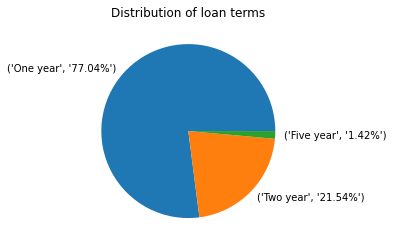

In [26]:
temp = data.Term.value_counts() # make values to plot to a series
labels = [('One year', '77.04%'), ('Two year', '21.54%'), ('Five year', '1.42%')] #set labels of relative value
plt.pie(temp, labels=labels); # plot pie chart
plt.title('Distribution of loan terms'); # set title

#### Observation
77.04% of loans are of the one year term, this is the most common loan term

#### Question
Are there more paid loans than overdue loans?
#### Visualization

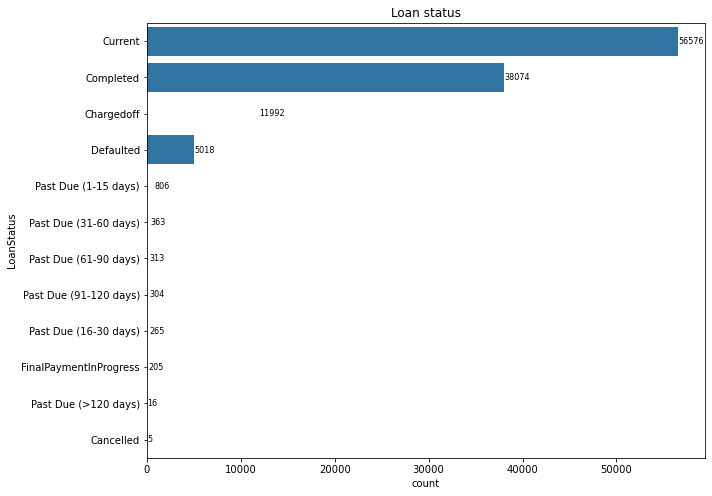

In [27]:
 # replace values in column with desired values
replaceDict = {'Chargedoff':'Charged off', 'Past Due (1-15 days)':'Past 15 days', 'Past Due (31-60 days)':'Past 60 days',
'Past Due (61-90 days)':'Past 90 days', 'Past Due (91-120 days)':'Past 120 days', 'Past Due (16-30 days)':'Past 90 days',
'FinalPaymentInProgress':'Final Payment', 'Past Due (>120 days)':'Past 120 days'}

statusCount = data.LoanStatus.value_counts()
data.LoanStatus.replace(replaceDict, inplace=True)

plt.figure(figsize=(10,8))
sb.countplot(data=data, y='LoanStatus', color=sb.color_palette()[0], order=statusCount.index) # plot bar chart

# set value labels
for i in range (statusCount.shape[0]):
    count = statusCount[i]
    plt.text(count+1, i, count, va='center', fontsize=8)

plt.title('Loan status'); # set title

#### Observation

There are more paid loans than there are overdue loans, however, most of the loans are still ongoing...

#### Question
Are there more poeple with higher interest rates than lower?
#### Visualization

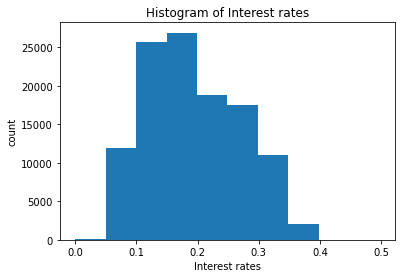

In [28]:
plt.hist(data.BorrowerRate); # plot histogram
plt.title('Histogram of Interest rates') # set title
plt.ylabel('count') # set y label
plt.xlabel('Interest rates'); # set x label

#### Observation
There are more people with lesser interest rates than there are people with higher interest rates

#### Question
is there any significant difference between the BorrowersRate and LenderYield?
#### Visualization

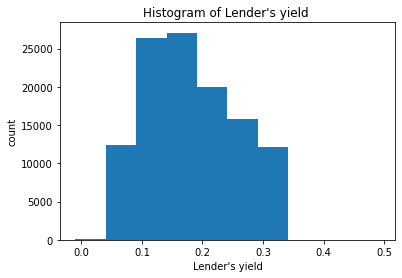

In [29]:
plt.hist(data.LenderYield); # plot histogram
plt.title('Histogram of Lender\'s yield ') # set plot title
plt.ylabel('count') # set y label 
plt.xlabel('Lender\'s yield'); # set x label

#### Observation

There are lesser people with higher Yields - this could mean that the servicing is fee is prolly higher for higher interest rates and probably validates why there are most people with lower interest rates

#### Question
How many of the debtors own a home?
#### Visualization

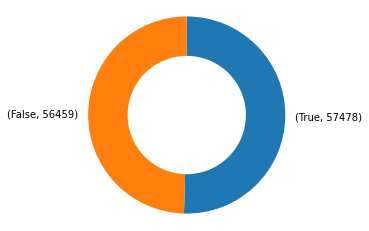

In [30]:
sortedCount = data.IsBorrowerHomeowner.value_counts()
labels = [(True, 57478), (False, 56459)]
plt.pie(sortedCount, labels = labels, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

#### Observation

There are slightly more people that own a home, ther are 50.45%

#### Question
What is the distribution of the different listing categoreies
#### Visualization

In [31]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.1580,0.1380,0,True,True,2007-08-26 18:41:46.780,1,24.0,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,0,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.0920,0.0820,2,False,False,2014-02-27 08:28:14.000,13,389.0,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,0,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,0.2750,0.2400,0,False,True,2007-01-02 14:09:10.060,0,0.0,Not displayed,True,2083.333333,6954337960046817851BCB2,0,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.0974,0.0874,16,True,False,2012-10-22 11:02:32.000,7,115.0,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,0,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.2085,0.1985,2,True,False,2013-09-14 18:38:44.000,6,220.0,"$100,000+",True,9583.333333,A180369302188889200689E,0,6,102670,15000,2013-09-20,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


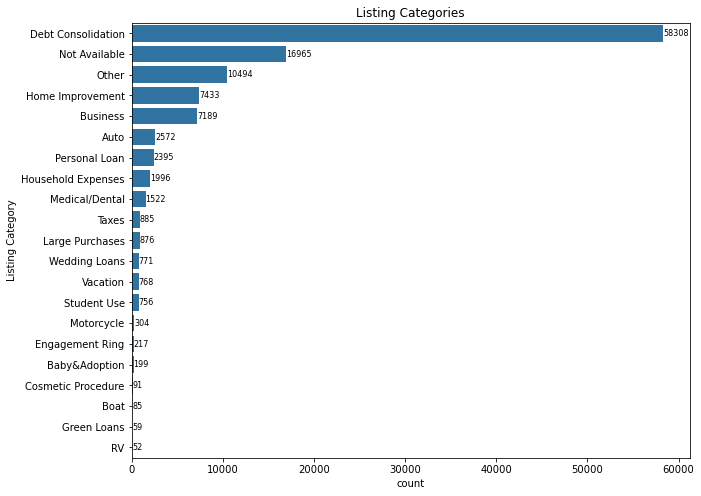

In [32]:
replaceDict = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use', 6:'Auto', 
7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 
15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
data['ListingCategory (numeric)'].replace(replaceDict, inplace=True)

data.rename(columns={'ListingCategory (numeric)':'Listing Category'}, inplace=True)
statusCount = data['Listing Category'].value_counts()

plt.figure(figsize=(10,8))

ax = sb.countplot(data=data, y='Listing Category', color=sb.color_palette()[0], order=statusCount.index) # plot bar chart

# set value labels
for i in range (statusCount.shape[0]):
    count = statusCount[i]
    plt.text(count+1, i, count, va='center', fontsize=8)

plt.title('Listing Categories'); # set title


#### Observation
Debt consolidation is the most occuring category

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was something unusual with the lender's yield histogram, I didn not perform any transformation because I don't think ther's a need to

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I cleaned the data to remove missing values, and reduce the dimensionality

## Bivariate Exploration

#### Question

Is there a correlationn between Loan amount and the interest rate?
#### Visualization

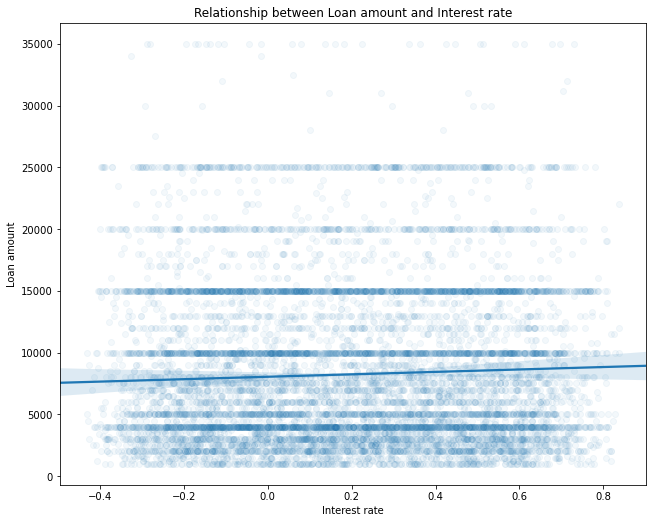

In [33]:
ax = sb.regplot(data=data, x=data.BorrowerRate.sample(10000), y=data.LoanOriginalAmount.sample(10000), 
truncate=False, x_jitter=0.5, scatter_kws={'alpha':1/20})

ax.figure.set_size_inches(10.5, 8.5)
plt.title('Relationship between Loan amount and Interest rate')
plt.xlabel('Interest rate')
plt.ylabel('Loan amount');

#### Observation

There is no correlation between the loan amount and the interest rate

#### Question

#### Visualization

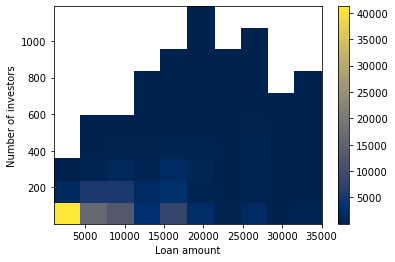

In [34]:
plt.hist2d(data.LoanOriginalAmount, data.Investors, cmin=0.5, cmap='cividis');
plt.colorbar();
plt.ylabel('Number of investors');
plt.xlabel('Loan amount');

#### Observation

There are more investors for smaller loans than there are for larger loans

#### Question
what is the distribution of loan amount grouped by loan status
#### Visualization

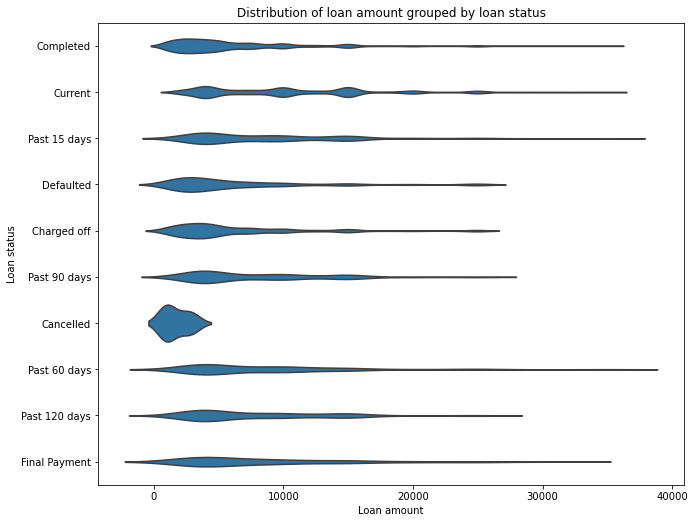

In [35]:
ax = sb.violinplot(data=data, y='LoanStatus', x='LoanOriginalAmount', color=sb.color_palette()[0], inner=None);
ax.figure.set_size_inches(10.5, 8.5)
plt.title('Distribution of loan amount grouped by loan status');
plt.xlabel('Loan amount');
plt.ylabel('Loan status');

#### Observation

People who cancelled their loans took loans of very little amount as oppose to other loan status

#### Question

Do home owners borrow thw most money?
#### Visualization

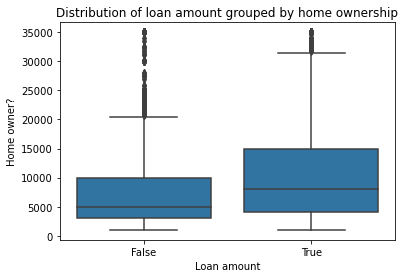

In [36]:
ax = sb.boxplot(data=data, x='IsBorrowerHomeowner', y='LoanOriginalAmount', color=sb.color_palette()[0]);
# ax.figure.set_size_inches(10.5, 8.5)
plt.title('Distribution of loan amount grouped by home ownership');
plt.xlabel('Loan amount');
plt.ylabel('Home owner?');

#### Observation

Home owners borrow the most money than people who are not home owners

#### Question
How is home ownership spread amongs different income ranges?
#### Visualization

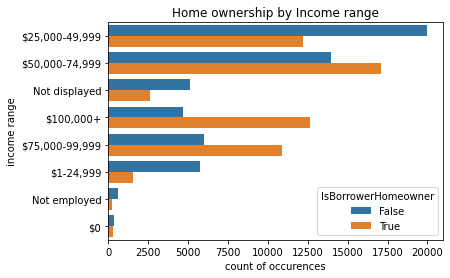

In [37]:
sb.countplot(data=data, y='IncomeRange', hue='IsBorrowerHomeowner')
plt.title('Home ownership by Income range');
plt.xlabel('count of occurences');
plt.ylabel('income range');

#### Observation

There are more home owners with an income range of $50k+ than home owners with an income of $100k

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Surprisingly there was no corellation relationship between loan amoount andd interest rate

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the boxplot chart there are so many outliers for the false category

## Multivariate Exploration

#### Question
For some of the quantitative variables is there any correlation?
#### Visualization

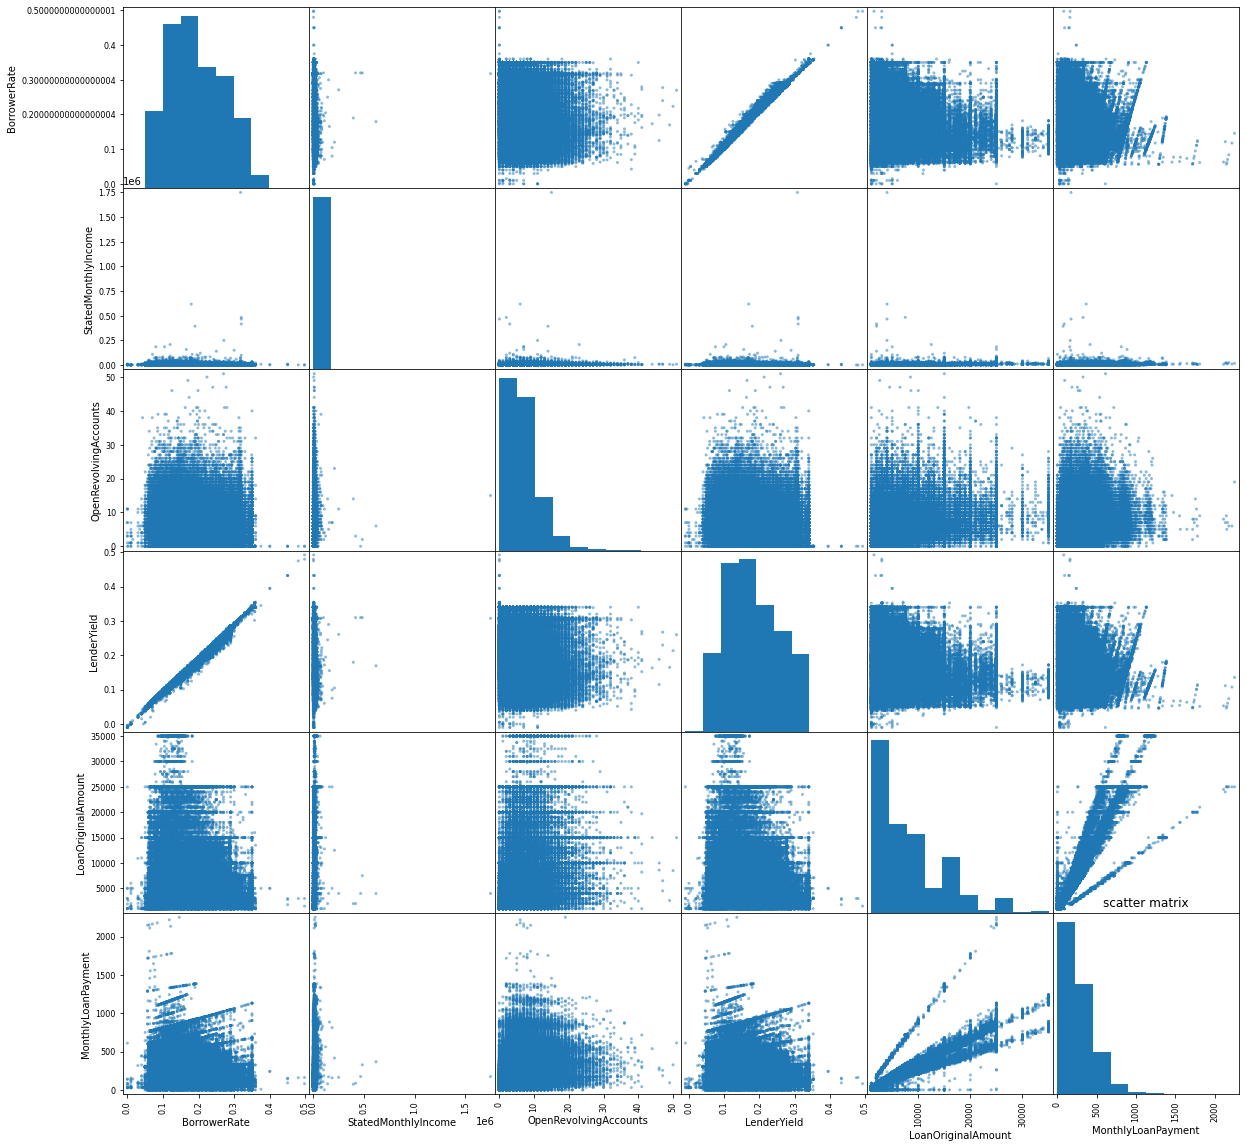

In [38]:
dimensions = data[['BorrowerRate', 'StatedMonthlyIncome',	'OpenRevolvingAccounts', 'LenderYield', 'LoanOriginalAmount', 'MonthlyLoanPayment']]
pd.plotting.scatter_matrix(dimensions, figsize = (20,20));
plt.title('scatter matrix');

#### Observation

there seems to be a correlation between interest rate and lenders yield

#### Question
What are the different loan status per term
#### Visualization

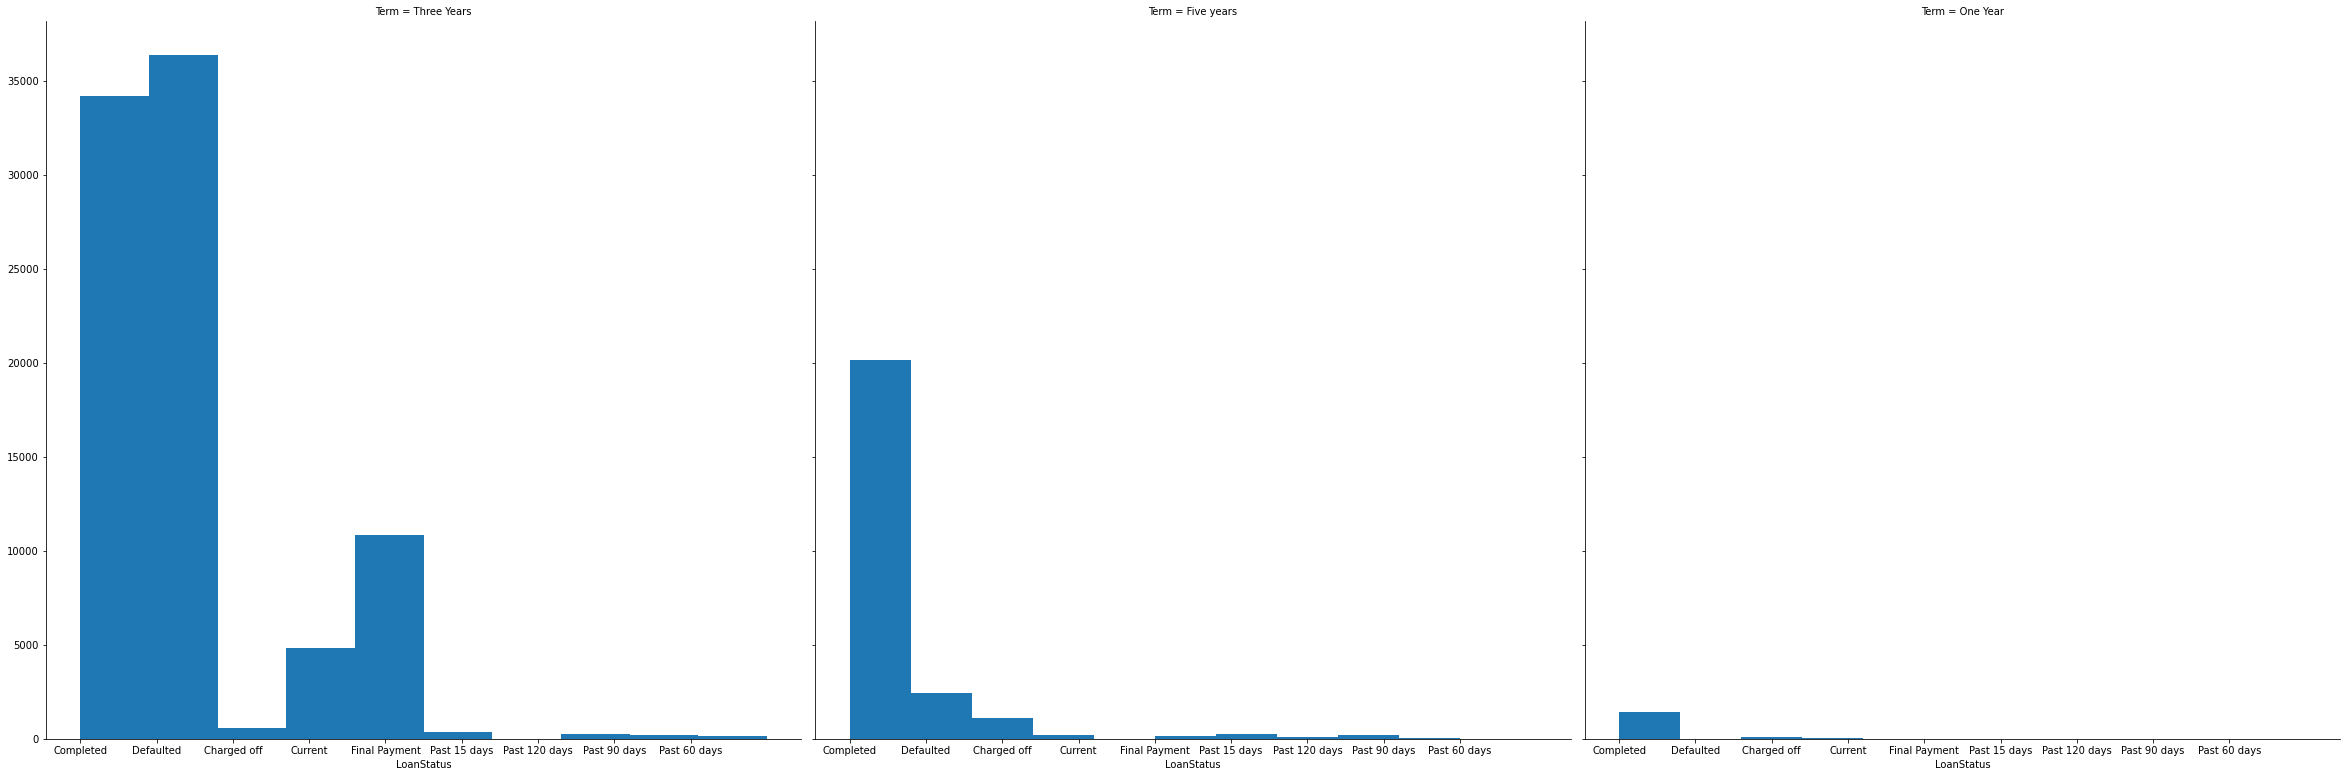

In [39]:
replaceDict = {12:'One Year', 36:'Three Years', 60:'Five years'}
data.Term.replace(replaceDict, inplace=True)

ax = sb.FacetGrid(data=data, col='Term', height=10.9, margin_titles=True);
ax.map(plt.hist, 'LoanStatus');

#### Observation
Accross all terms, at least 5% of loans have beeen completed

#### Question

#### Visualization

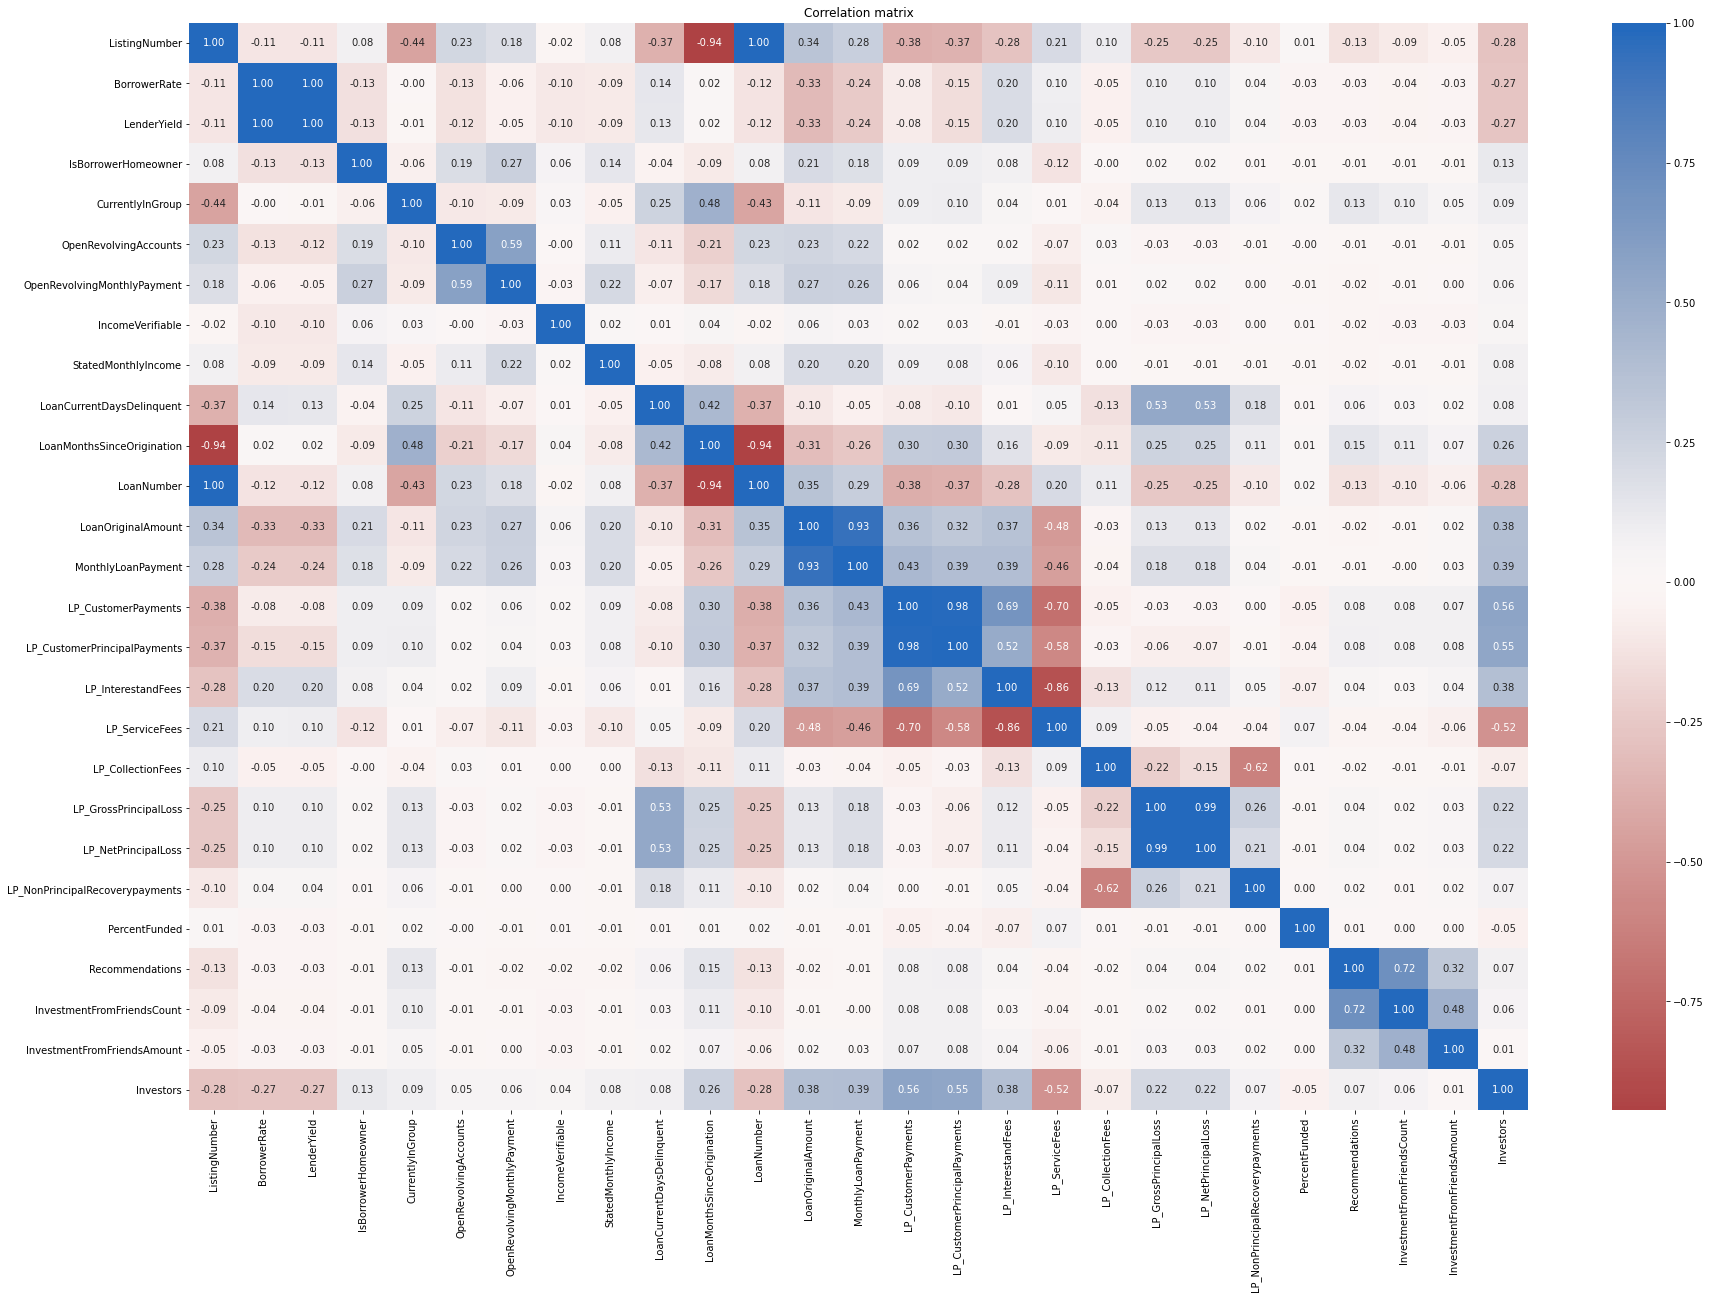

In [40]:
fig, ax = plt.subplots(figsize=(30,20));
sb.heatmap(data.corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0, ax=ax);
plt.title('Correlation matrix');

#### Observation

there is a negative correlation between investors and LP service fees

#### Question

#### Visualization

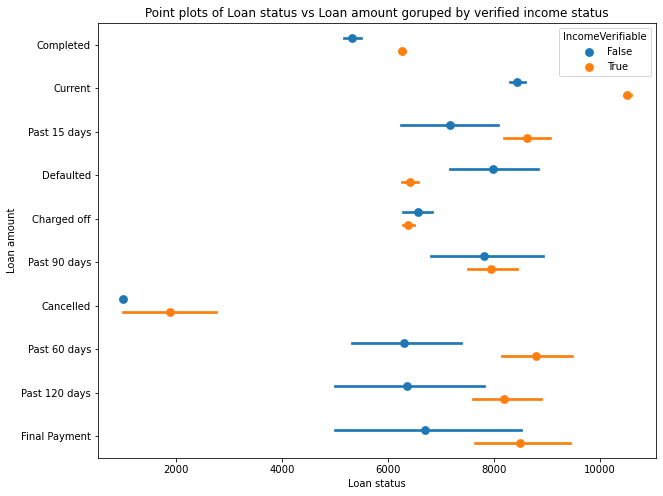

In [41]:
fig, ax = plt.subplots(figsize=(10,8));
sb.pointplot(data=data, y='LoanStatus', x='LoanOriginalAmount', hue='IncomeVerifiable', dodge = 0.3, linestyles = "", ax=ax);
plt.title('Point plots of Loan status vs Loan amount goruped by verified income status');
plt.xlabel('Loan status');
plt.ylabel('Loan amount');

#### Observation

For higher loans amounts there are more people with unverified incomes

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a positive coreelation between Interest rate and Lender's yeild

### Were there any interesting or surprising interactions between features?

> For the Distribution of loan amount grouped by home ownership (where false,) there are a lot of outliers

## Conclusions

- More people are likely tp take a loan fro a three year term
- More poeple are likely to pay back their loan

In [49]:
data.to_csv('Prosper loan data.csv')